<span style="color:lightblue;">Esse notebook será apenas um exemplo de como gostaria que o trabalho final se estruturasse, os DataSets aqui presentes podem ser os escolhidos como também podem não ser.</span>

### Melhorias Sugeridas

* Comentar melhor todos os passos feitos.
* Falar sobre vantagens e desvantagens de cada método.
* Uma boa conclusão e possíveis melhores métodos.
* Uma melhor análise exploratória.
* Análise de overfitting.
* Falar sobre outras métricas sem ser acurácia e qual é a mais adequada para esse problema (Minimizar Falsos Negativos).

# Heart Disease Dataset 
(Dataset disponível em > [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download) <)

A principal ideia desse Dataset é de alguma maneira conseguir preditar um indíviduo possivelmente com alguma doença cardíaca a partir de 

fatores pessoiais. 


Esse Dataset reúne dados de 1988 de 4 lugares diferentes, sendo eles: Cleveland, Hungary, Switzerland e Long Beach V. As colunas são compostas por essas 14 variáveis:



1. **age**  
   Idade do paciente em anos.

2. **sex**  
   Sexo do paciente:  
   - 1 = Masculino  
   - 0 = Feminino

3. **chest pain type (4 values)**  
   Tipo de dor no peito apresentada pelo paciente:  
   - 0 = Angina típica  
   - 1 = Angina atípica  
   - 2 = Dor não anginosa  
   - 3 = Assintomático

4. **resting blood pressure**  
   Pressão arterial em repouso (em mm Hg) medida na admissão do hospital.

5. **serum cholestoral in mg/dl**  
   Nível de colesterol sérico (em mg/dl).

6. **fasting blood sugar > 120 mg/dl**  
   Açúcar no sangue em jejum maior que 120 mg/dl:  
   - 1 = Verdadeiro  
   - 0 = Falso

7. **resting electrocardiographic results (values 0, 1, 2)**  
   Resultados do exame eletrocardiográfico em repouso:  
   - 0 = Normal  
   - 1 = Anormalidade na onda ST-T  
   - 2 = Hipertrofia ventricular esquerda provável ou definitiva

8. **maximum heart rate achieved**  
   Frequência cardíaca máxima atingida durante o exercício.

9. **exercise induced angina**  
   Angina induzida por exercício:  
   - 1 = Sim  
   - 0 = Não

10. **oldpeak**  
    Depressão do segmento ST induzida pelo exercício em relação ao repouso (medida em mm).  
    Indica alterações no ECG associadas à isquemia.

11. **the slope of the peak exercise ST segment**  
    Inclinação do segmento ST durante o exercício máximo:  
    - 0 = Ascendente  
    - 1 = Plano  
    - 2 = Descendente

12. **number of major vessels (0–3) colored by flourosopy**  
    Número de vasos principais (de 0 a 3) coloridos pela fluoroscopia.

13. **thal**  
    Resultado do exame de talassemia:  
    - 0 = Normal  
    - 1 = Defeito fixo  
    - 2 = Defeito reversível

14. **target**
   Possui ou não possui doença cardíaca
   - 0 = Indivíduo não possúi doença cardíaca
   - 1 = Indivíduo possúi doença cardíaca

## Análise exploratória

Para começar a análise exploratória vamos primeiramente fazer algumas importações necessárias.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [3]:
heart_ds = pd.read_csv("heart.csv")
heart_ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
len(heart_ds)

1025

Temos inicialmente 1025 pacientes para analisar, porém ao analisarmos mais a fundo vemos que vários desses dados são dados duplicados, ou seja, são apenas linhas repetidas, e elaborar modelos com Datasets com dados repetidos é péssimo, já que dessa maneira estamos enviesando a distribuição dos dados.

In [5]:
heart_ds.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [6]:
heart_ds = heart_ds.drop_duplicates()
len(heart_ds)

302

O tamanho do nosso Dataset decresceu muito, porém agora temos mais fidelidade nos dados coletados.

In [16]:
heart_ds.dropna() # Tirando também dados incompletos caso existam

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Aqui, veremos as distribuicões das variáveis, onde podemos fazer a identificaçao de outlier e termos uma visao do equilibrio das distribuiçoes dos dados.

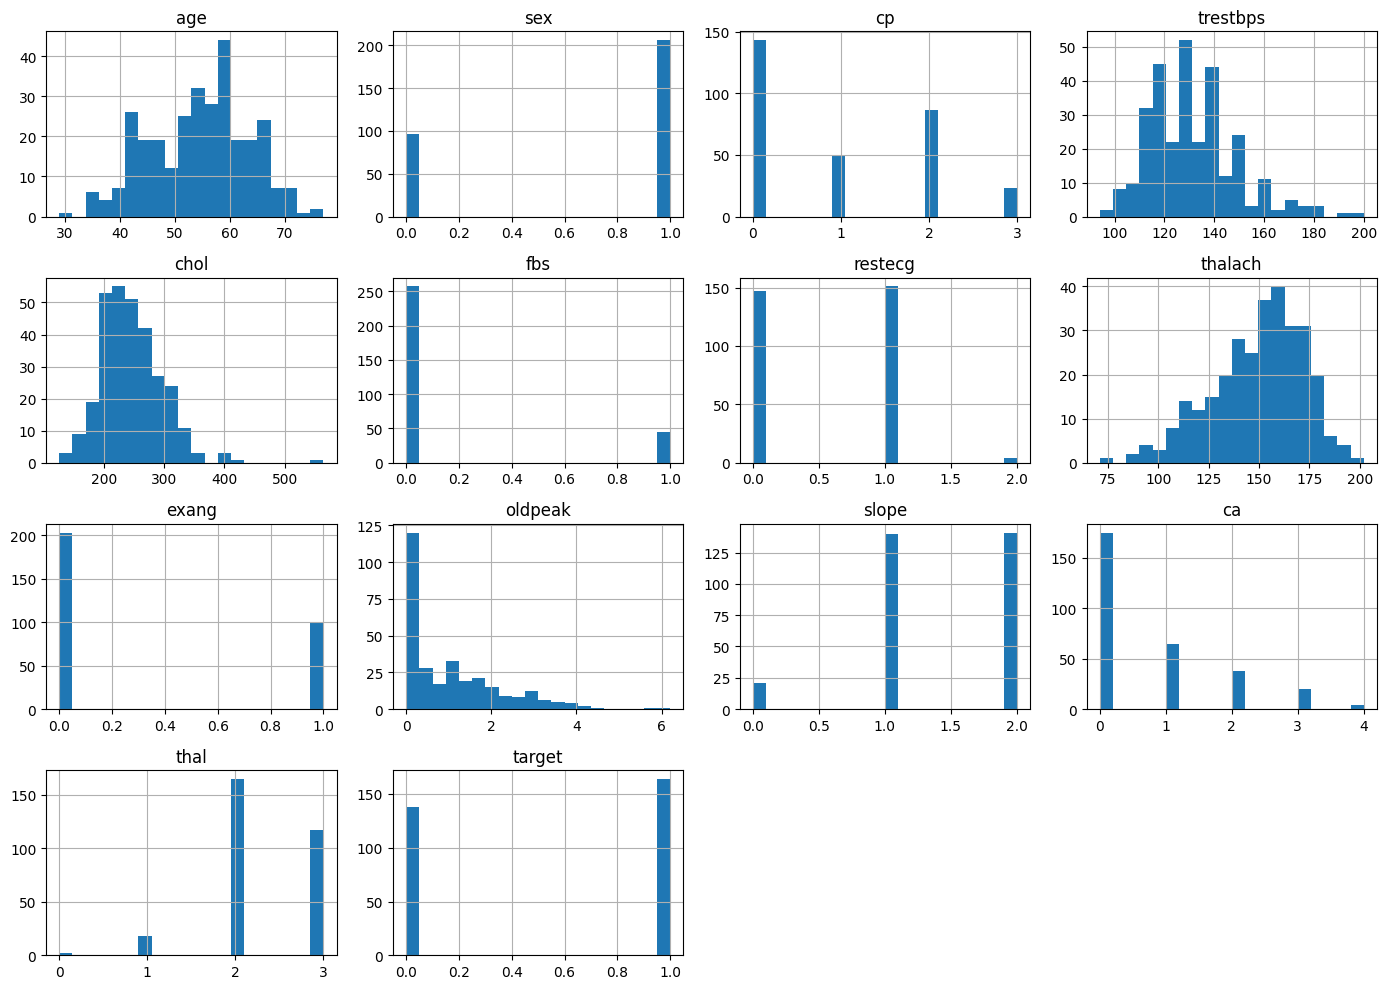

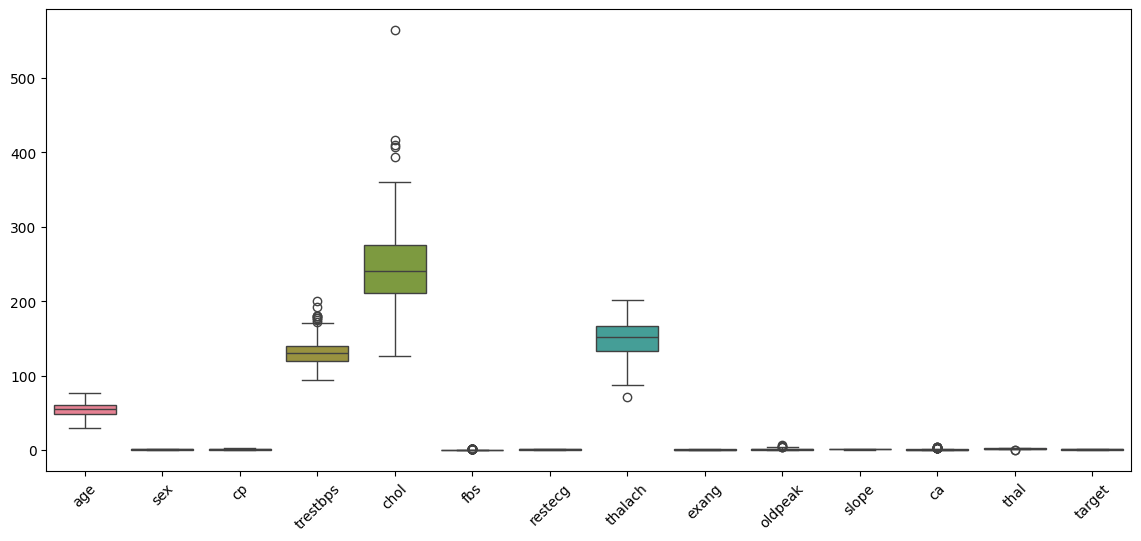

In [7]:
df = heart_ds

df.hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()

# Boxplots para verificar outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=45)
plt.show()


Temos um grande outlier nos dados de colesterol, porém pode ser explicado por alguma doença presente no indivíduo que traz essa característica. Outra importante análise é a do balancemanto entre indíviduos classificados com target = 0  e target = 1.

É muito importante para realizar modelos preditivos treinar com um Dataset bem balanceado, já que se não, seria benéfico ao modelo "chutar" mais de algum tipo dependendo do balanceamento. Por exemplo, se um dataset tiver 90% dos dados classificados como `não possui doença cardíaca` e o modelo classificar apenas como `não possui doença cardíaca` a acuracia do do modelo será de 90%, dando a falsa impressão de que o modelo é bom. Porém o modelo estará cometendo um dos mais graves erros na área medica: classificar um paciente doente como um paciente normal. Logo, é de suma importancia olhar para as distribuiçoes das classes para podermos tomar decisoes de forma a atenuar esse problema. 

Podemos ver que o Dataset usado apresenta desequilibrio de de algumas variáveis que pretendemos utilizar como variáveis preditoras. Se as variáveis preditivas que tem correlação considerada razoavelmente boa `(> 0.3 em módulo)`, uma estratégia valida para lidar com esse desequilibrio seria utilizar modelos grandes para geraçao de dados sinteticos de forma a equilibrar as variáveis preditivas. Isso costuma fortalecer a capacidade de generalizaçao do modelo.

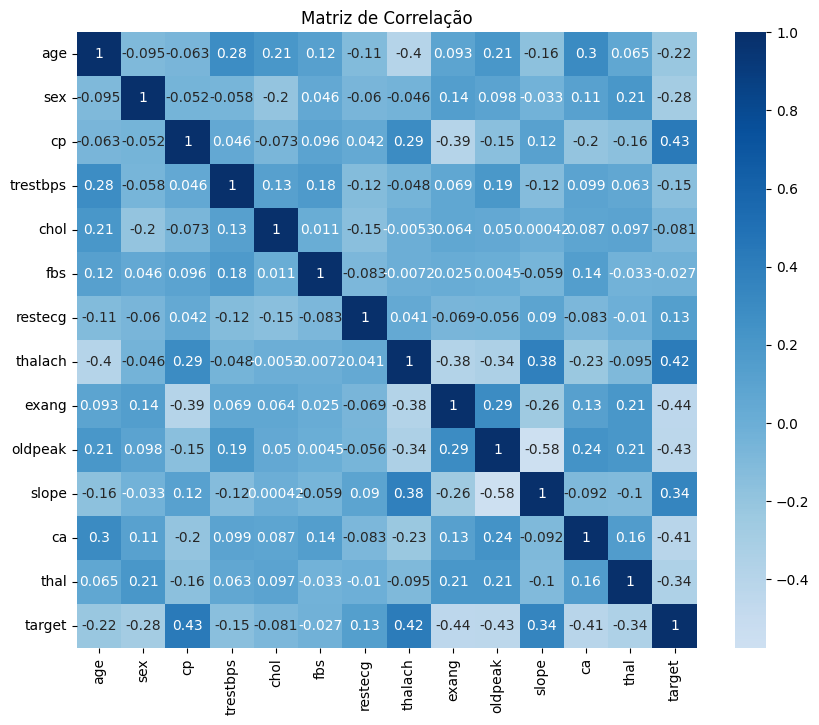

In [8]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="Blues", center=0)
plt.title("Matriz de Correlação")
plt.show()


## Modelos de classificação para target

Trata-se de uma classificação binária, então podemos fazer diversos modelos, aqui trataremos desses:
- regrassao linear
- LDA
- QDA
- Regressão Logística
- KNN
- SVM
- Rede Neural

Por fim faremos a comparação fiel entre os modelos e qual seria mais adequado para essa devida tarefa.

### Regressão Linear (Classificação)

In [21]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

A ideia da utilizaçao de regrassão linear para classificaçao é tentar prever a variável alvo como uma variável categórica alvo como uma variavel continua e usar um limiar a partir do qual classificaremos o alvo como categorico. Se temos duas classes para prever, uma aproximação

In [ ]:
X = heart_ds.drop("target", axis=1)
y = heart_ds["target"]

categorical_cols = ['cp', 'thal', 'slope', 'restecg']
categorical_cols = [c for c in categorical_cols if c in X.columns]
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_const = sm.add_constant(X) # aciciona constante para o intercepto

X_train, X_test, y_train, y_test = train_test_split(X_const, y, test_size=0.3, random_state=42, stratify=y)

X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)
model_ols = sm.OLS(y_train, X_train).fit()
print(model_ols.summary())

y_pred_train = model_ols.predict(X_train)
y_pred_test  = model_ols.predict(X_test)

y_pred_train = np.where(y_pred_train > 0.5, 1, 0)
y_pred_test  = np.where(y_pred_test  > 0.5, 1, 0)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     14.62
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           6.08e-28
Time:                        15:16:39   Log-Likelihood:                -57.548
No. Observations:                 211   AIC:                             155.1
Df Residuals:                     191   BIC:                             222.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2762      0.426      0.648      0.5

Vamos analisar como foram nossas predições com esse modelo de regressão linear:

Acurácia no conjunto de treino: 0.877


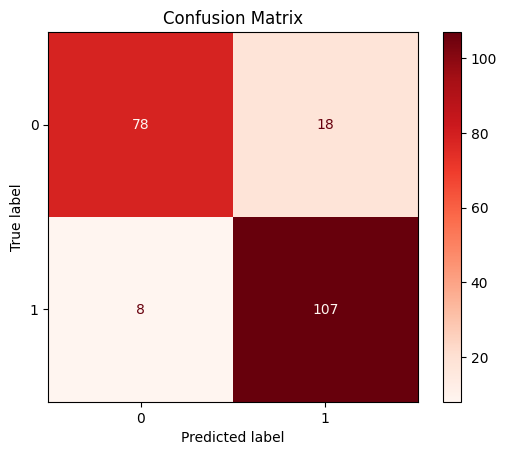

In [23]:
for i in range(len(y_pred_train)):
    if y_pred_train[i] <= 0.5:
        y_pred_train[i] = 0
    else:
        y_pred_train[i] = 1

acc = accuracy_score(y_train, y_pred_train)
print(f"Acurácia no conjunto de treino: {acc:.3f}")

cm = confusion_matrix(y_train, y_pred_train)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()


Acurácia no conjunto de teste: 0.791


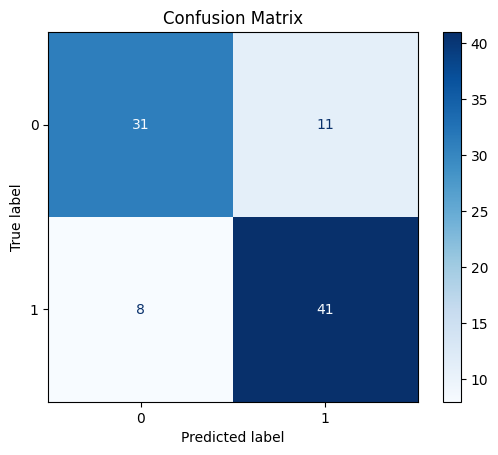

In [24]:
for i in range(len(y_pred_test)):
    if y_pred_test[i] <= 0.5:
        y_pred_test[i] = 0
    else:
        y_pred_test[i] = 1

acc = accuracy_score(y_test, y_pred_test)
print(f"Acurácia no conjunto de teste: {acc:.3f}")

cm = confusion_matrix(y_test, y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Para comparar nosso modelo com outros, precisamos de uma estimativa mais robusta da sua acurácia média. 

Para isso, usaremos a validação cruzada (cross-validation), analisando o desempenho da regressão linear em 5 treinos diferentes. 

Isso nos dará uma estimativa média de acurácia mais confiável.

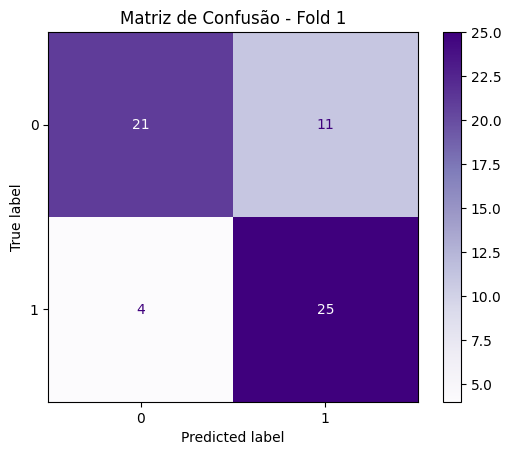

Fold 1 - Acurácia: 0.754


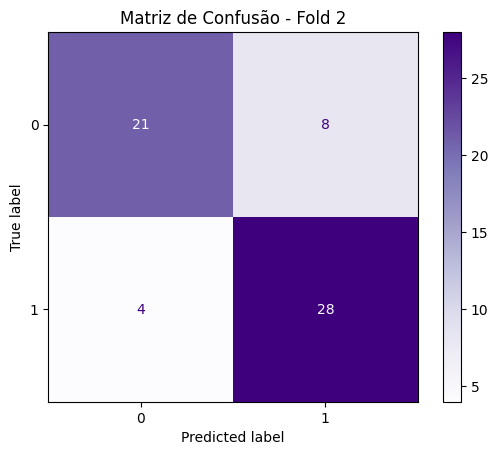

Fold 2 - Acurácia: 0.803


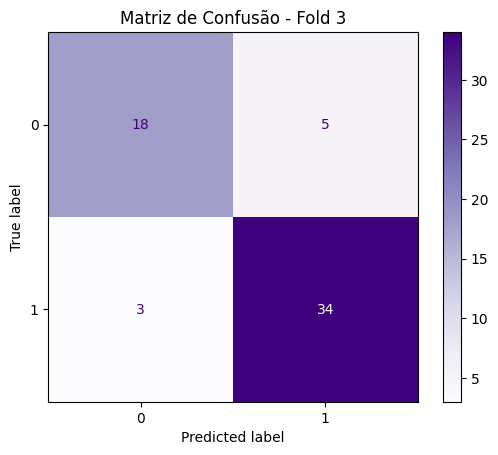

Fold 3 - Acurácia: 0.867


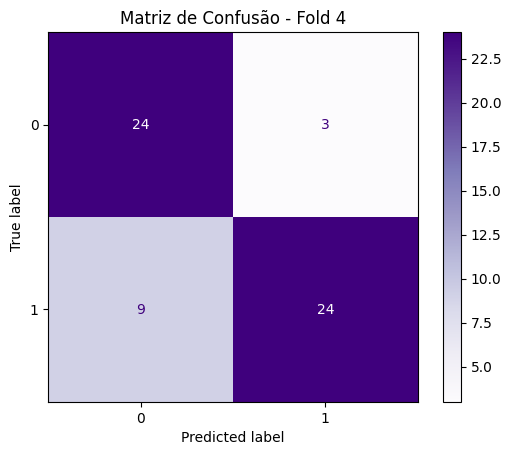

Fold 4 - Acurácia: 0.800


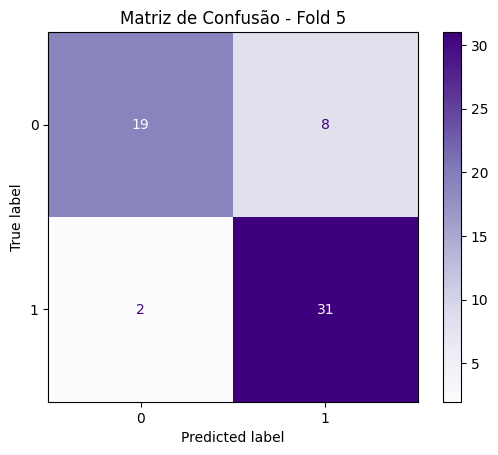

Fold 5 - Acurácia: 0.833
Acurácias por fold: [0.7540983606557377, 0.8032786885245902, 0.8666666666666667, 0.8, 0.8333333333333334]
Acurácia média: 0.811 ± 0.037


In [26]:
# Validação cruzada (KFold) treinando OLS em cada fold (statsmodels)
X_df = heart_ds.drop("target", axis=1)
y = heart_ds["target"].to_numpy()
# One-hot encoding (aplica apenas colunas presentes)
categorical_cols = ['cp', 'thal', 'slope', 'restecg']
categorical_cols = [c for c in categorical_cols if c in X_df.columns]
if len(categorical_cols) > 0:
    X_df = pd.get_dummies(X_df, columns=categorical_cols, drop_first=True)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
fold = 1

for train_index, test_index in kf.split(X_df):
    X_train = X_df.iloc[train_index]
    X_test  = X_df.iloc[test_index]
    y_train = y[train_index]
    y_test  = y[test_index]

    # adiciona constante por fold
    X_train_const = sm.add_constant(X_train).astype(float)
    X_test_const  = sm.add_constant(X_test).astype(float)

    model = sm.OLS(y_train, X_train_const).fit()
    y_pred = model.predict(X_test_const)
    y_pred_binary = (y_pred > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred_binary)
    accuracies.append(acc)

    cm = confusion_matrix(y_test, y_pred_binary)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Purples)
    plt.title(f"Matriz de Confusão - Fold {fold}")
    plt.show()

    print(f"Fold {fold} - Acurácia: {acc:.3f}")
    fold += 1

print(f"Acurácias por fold: {accuracies}")
print(f"Acurácia média: {np.mean(accuracies):.3f} ± {np.std(accuracies):.3f}")

Agora, vamos tentar obter resultados melhores ou semelhantes por meio de uma seleção de preditores. 

Usaremos o método de Backward Elimination (Eliminação Reversa), que remove o preditor com o maior p-valor, um de cada vez, 

até que todos os preditores restantes tenham p-valores ≤0.05 (nosso α definido).

In [27]:
def backward_elimination(X, y, alpha=0.05):
    X = sm.add_constant(X)  # adiciona o intercepto (const)
    variables = list(X.columns)
    
    while True:
        model = sm.OLS(y, X[variables]).fit()
        p_values = model.pvalues.drop("const", errors='ignore')
        max_p = p_values.max()
        if max_p > alpha:
            worst_feature = p_values.idxmax()
            print(f"Removendo variável: {worst_feature} (p = {max_p:.4f})")
            variables.remove(worst_feature)
        else:
            break
    
    print("\n✅ Modelo final com variáveis:")
    print(variables)
    
    return model


X = heart_ds.drop("target", axis=1)
y = heart_ds["target"]

modelo_final = backward_elimination(X, y, alpha=0.05)


print(modelo_final.summary())


Removendo variável: age (p = 0.8851)
Removendo variável: fbs (p = 0.7204)
Removendo variável: chol (p = 0.4179)
Removendo variável: restecg (p = 0.1845)
Removendo variável: slope (p = 0.0569)

✅ Modelo final com variáveis:
['const', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     37.88
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           4.80e-41
Time:                        15:18:00   Log-Likelihood:                -110.83
No. Observations:                 302   AIC:                             239.7
Df Residuals:                     293   BIC:                             273.1
Df Model:                           8                            

Vamos fazer agora o modelo sem as variáveis que foram retiradas e analisar a diferença entre o modelo anterior e este:

In [16]:
# Preparando features selecionadas (aplica one-hot nas categóricas presentes)
selected_features = ['sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']
selected_features = [c for c in selected_features if c in heart_ds.columns]
X_sel = heart_ds[selected_features].copy()
# One-hot apenas nas colunas categóricas que estiverem entre as selecionadas
categorical_cols = ['cp', 'thal', 'slope', 'restecg']
categorical_cols = [c for c in categorical_cols if c in X_sel.columns]
if len(categorical_cols) > 0:
    X_sel = pd.get_dummies(X_sel, columns=categorical_cols, drop_first=True)
y = heart_ds['target'].to_numpy()

# adiciona constante e faz split
X_sel_const = sm.add_constant(X_sel)
X_train, X_test, y_train, y_test = train_test_split(X_sel_const, y, test_size=0.3, random_state=42, stratify=y)

# Ajuste OLS via statsmodels
model_sel = sm.OLS(y_train, X_train).fit()
print(model_sel.summary())

# Previsões contínuas -> binárias (threshold 0.5)
y_pred_train = model_sel.predict(X_train)
y_pred_test  = model_sel.predict(X_test)
y_pred_train = np.where(y_pred_train > 0.5, 1, 0)
y_pred_test  = np.where(y_pred_test  > 0.5, 1, 0)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Acurácia no conjunto de treino: 0.877


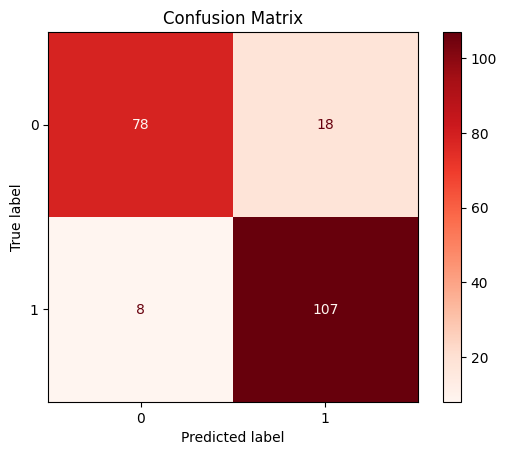

In [17]:
for i in range(len(y_pred_train)):
    if y_pred_train[i] <= 0.5:
        y_pred_train[i] = 0
    else:
        y_pred_train[i] = 1


acc = accuracy_score(y_train, y_pred_train)
print(f"Acurácia no conjunto de treino: {acc:.3f}")

cm = confusion_matrix(y_train, y_pred_train)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()


Acurácia no conjunto de teste: 0.791


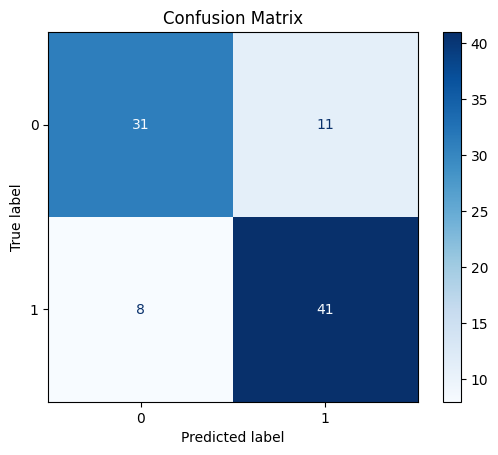

In [18]:
for i in range(len(y_pred_test)):
    if y_pred_test[i] <= 0.5:
        y_pred_test[i] = 0
    else:
        y_pred_test[i] = 1
    

acc = accuracy_score(y_test, y_pred_test)
print(f"Acurácia no conjunto de teste: {acc:.3f}")

cm = confusion_matrix(y_test, y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


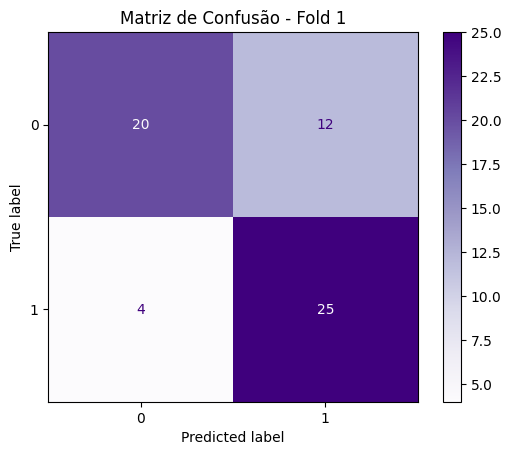

Fold 1 - Acurácia: 0.738


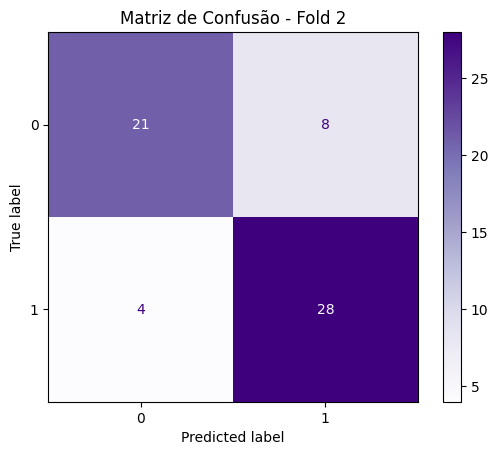

Fold 2 - Acurácia: 0.803


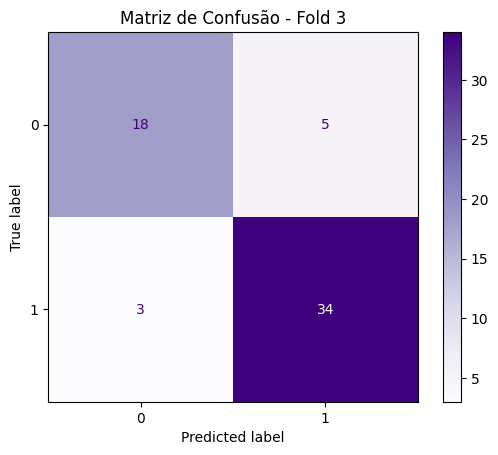

Fold 3 - Acurácia: 0.867


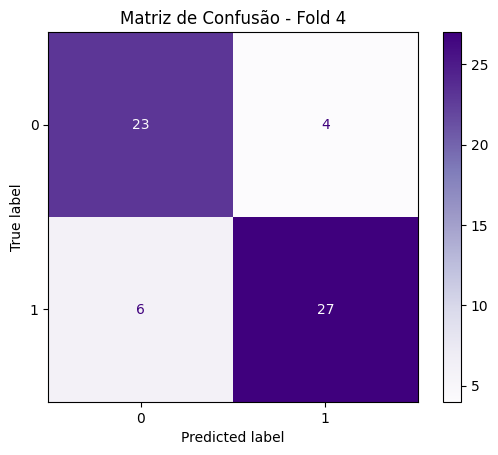

Fold 4 - Acurácia: 0.833


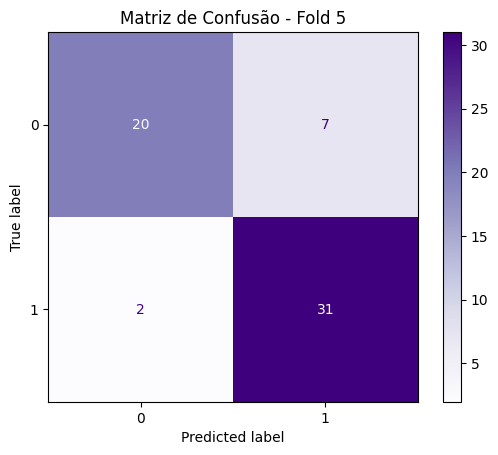

Fold 5 - Acurácia: 0.850
Acurácias por fold: [0.7377049180327869, 0.8032786885245902, 0.8666666666666667, 0.8333333333333334, 0.85]
Acurácia média: 0.818 ± 0.045


In [20]:
# KFold para as features selecionadas (com one-hot e OLS por fold)
selected_features = ['sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']
selected_features = [c for c in selected_features if c in heart_ds.columns]
X_sel = heart_ds[selected_features].copy()
# One-hot nas categóricas presentes entre as selecionadas
categorical_cols = ['cp', 'thal', 'slope', 'restecg']
categorical_cols = [c for c in categorical_cols if c in X_sel.columns]
if len(categorical_cols) > 0:
    X_sel = pd.get_dummies(X_sel, columns=categorical_cols, drop_first=True)
y = heart_ds['target'].to_numpy()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
fold = 1

for train_index, test_index in kf.split(X_sel):
    X_train = X_sel.iloc[train_index]
    X_test  = X_sel.iloc[test_index]
    y_train = y[train_index]
    y_test  = y[test_index]

    X_train_const = sm.add_constant(X_train)
    X_test_const  = sm.add_constant(X_test)

    X_train_const = X_train_const.astype(float)
    X_test_const  = X_test_const.astype(float)

    model = sm.OLS(y_train, X_train_const).fit()
    y_pred = model.predict(X_test_const)
    y_pred_binary = (y_pred > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred_binary)
    accuracies.append(acc)

    cm = confusion_matrix(y_test, y_pred_binary)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Purples)
    plt.title(f"Matriz de Confusão - Fold {fold}")
    plt.show()

    print(f"Fold {fold} - Acurácia: {acc:.3f}")
    fold += 1

print(f"Acurácias por fold: {accuracies}")
print(f"Acurácia média: {np.mean(accuracies):.3f} ± {np.std(accuracies):.3f}")

o analisar os resultados da validação cruzada, observamos um desenvolvimento muito positivo: a métrica de performance média do nosso novo modelo (refinado pelo método Backward Elimination) é, de fato, superior à do modelo inicial, que utilizava todos os preditores.

Este resultado fornece uma forte evidência empírica para a nossa hipótese. Ele demonstra que as variáveis excluídas durante o processo de seleção — aquelas com p-valores consistentemente acima do nosso limiar de 0.05 — não estavam contribuindo de forma significativa para explicar a variância da nossa variável target.

Na verdade, a melhoria na performance sugere que esses preditores estavam agindo como "ruído". A presença deles no modelo original provavelmente introduzia uma complexidade desnecessária, podendo até levar a um leve overfitting. O modelo completo poderia estar ajustando-se a padrões aleatórios nos dados de treino que não se generalizam, o que explica por que sua performance média na validação cruzada (que simula dados "novos") era inferior.

Portanto, a aplicação do Backward Elimination foi duplamente vantajosa:

-    Melhorou a Parcimônia: Conseguimos um modelo mais simples, com menos variáveis, que é inerentemente mais fácil de interpretar e explicar.

-   Melhorou a Performance Preditiva: Ao remover as variáveis não significantes, reduzimos o ruído e criamos um modelo que generaliza melhor para novos dados, conforme validado pela melhoria na métrica média do cross-validation.

### Regressão Logística

In [219]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, f1_score
import numpy as np


X = heart_ds.drop("target", axis=1).to_numpy()
y = heart_ds["target"]
X = np.column_stack((np.ones(len(X)), X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression().fit(X_train,y_train)

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)


Acurácia no conjunto de treino: 0.844


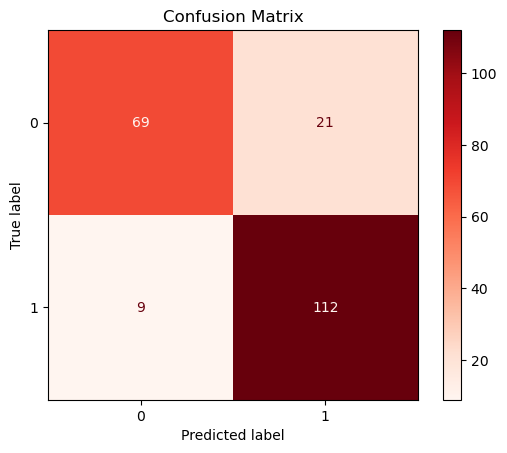

In [220]:
cm = confusion_matrix(y_train, y_train_predict)
acc = accuracy_score(y_train, y_pred_train)
print(f"Acurácia no conjunto de treino: {acc:.3f}")
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()


Acurácia no conjunto de teste: 0.802


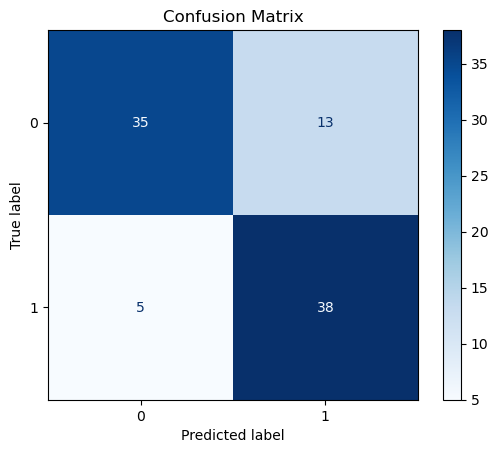

In [221]:
cm = confusion_matrix(y_test, y_pred_test)
acc = accuracy_score(y_test, y_pred_test)
print(f"Acurácia no conjunto de teste: {acc:.3f}")
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Cross validation:

In [222]:
import warnings

warnings.filterwarnings("ignore")

X = heart_ds.drop("target", axis=1).to_numpy()
y = heart_ds["target"].to_numpy()

model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
f1_scores  = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(f1_score))

print(f"Acurácia média: {np.mean(acc_scores):.3f} ± {np.std(acc_scores):.3f}")

Acurácia média: 0.841 ± 0.032


### KNN

Acurácia: 0.791


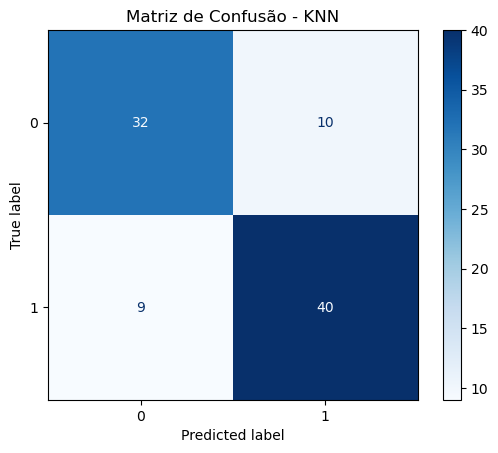

In [223]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


X = heart_ds.drop("target", axis=1).to_numpy()
y = heart_ds["target"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)


print(f"Acurácia: {acc_knn:.3f}")

cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap="Blues")
plt.title("Matriz de Confusão - KNN")
plt.show()


In [224]:
X = heart_ds.drop("target", axis=1).to_numpy()
y = heart_ds["target"].to_numpy()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=5)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_scores = cross_val_score(knn, X_scaled, y, cv=cv, scoring='accuracy')

print(f"Acurácia média: {np.mean(acc_scores):.3f} ± {np.std(acc_scores):.3f}")


Acurácia média: 0.805 ± 0.021


### SVM

Acurácia: 0.780


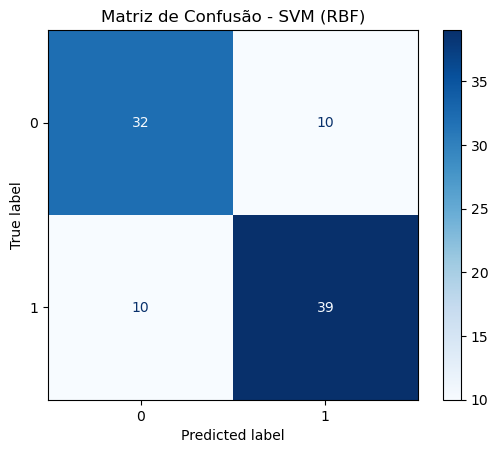

In [227]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

print(f"Acurácia: {acc_svm:.3f}")

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap="Blues")
plt.title("Matriz de Confusão - SVM (RBF)")
plt.show()


Cross validation:

In [228]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


acc_scores_svm = cross_val_score(svm, X_scaled, y, cv=cv, scoring='accuracy')

print(f"Acurácia média: {np.mean(acc_scores_svm):.3f} ± {np.std(acc_scores_svm):.3f}")


Acurácia média: 0.828 ± 0.026


### Rede Neural:

In [375]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random

seed = 42
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

X = heart_ds.drop("target", axis=1).to_numpy()
y = heart_ds["target"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(input_dim, 32),   
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 16),        
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(16, 1),  
            nn.Sigmoid()                
        )
        
    def forward(self, x):
        return self.model(x)

input_dim = X_train.shape[1]
model = SimpleNN(input_dim)

criterion = nn.BCELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

best_acc = 0
patience = 25
counter = 0

epochs = 1000
for epoch in range(epochs):
    model.train()
    
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    model.eval()
    with torch.no_grad():
        y_pred_val = (model(X_test_tensor) > 0.5).float()
        acc_val = accuracy_score(y_test_tensor, y_pred_val)
    
    if acc_val > best_acc:
        best_acc = acc_val
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping na epoch {epoch+1}")
            break

model.eval()
with torch.no_grad():
    y_pred_test_probs = model(X_test_tensor)
    y_pred_test = (y_pred_test_probs > 0.5).float() 


    y_pred_train_probs = model(X_train_tensor)
    y_pred_train = (y_pred_train_probs > 0.5).float()

# Acurácia
acc_test = accuracy_score(y_test_tensor, y_pred_test)
acc_train = accuracy_score(y_train_tensor, y_pred_train)

print(f"Acurácia no conjunto de treino: {acc_train:.3f}")
print(f"Acurácia no conjunto de teste : {acc_test:.3f}")



Epoch [20/1000], Loss: 0.6834
Epoch [40/1000], Loss: 0.6229
Epoch [60/1000], Loss: 0.5668
Early stopping na epoch 69
Acurácia no conjunto de treino: 0.839
Acurácia no conjunto de teste : 0.846
